In [1]:
using ApproxFun
using SpecialFunctions

using LinearAlgebra
using SparseArrays

include("../src/Chebyshev.jl")
import .Chebyshev as CH

include("../src/SpectralRadialODE.jl")
import .SpectralRadialODE as RODE

import Plots
using Plots

import HDF5


In [11]:
using GenericLinearAlgebra

# First try n=0

In [2]:
# input params
nr1 = 40;
nr2 = 60;
nr3 = 80;

s = -2;
l = 2;
m = 2;
n = 11;
T=BigFloat;
a = T(0.99);
bhm = T(1);

rmin = T(0); ## location of future null infinity (1/r = ∞)
rmax = abs(a) > 0 ? (bhm / (a^2)) * (1 - sqrt(1 - ((a / bhm)^2))) : 0.5 / bhm;

In [3]:
Float64(a)

0.99

In [47]:
M3 = RODE.radial_operator(nr3,s,l,m,n,a,bhm,rmin,rmax);

In [48]:
M1 = M3[1:nr1,1:nr1];
M2 = M3[1:nr2,1:nr2];


In [59]:
null1 = nullspace(Matrix(M1),rtol=1e-7);
null2 = nullspace(Matrix(M2),rtol=1e-7);
null3 = nullspace(Matrix(M3),rtol=1e-7);

In [60]:
v1 = CH.to_real(null1[:,end]);
v2 = CH.to_real(null2[:,end]);
v3 = CH.to_real(null3[:,end]);

In [61]:
rs1 = CH.cheb_pts(rmin,rmax,nr1);
rs2 = CH.cheb_pts(rmin,rmax,nr2);
rs3 = CH.cheb_pts(rmin,rmax,nr3);

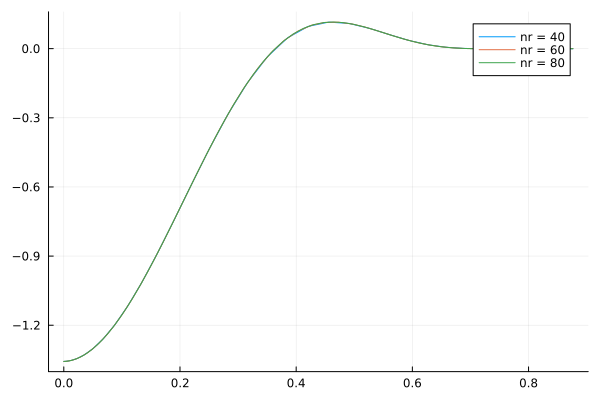

In [73]:
Plots.plot( rs1,[-v.re for v in v1],label="nr = 40")
Plots.plot!( rs2,[v.re for v in v2],label="nr = 60")
Plots.plot!( rs3,[v.re for v in v3],label="nr = 80")


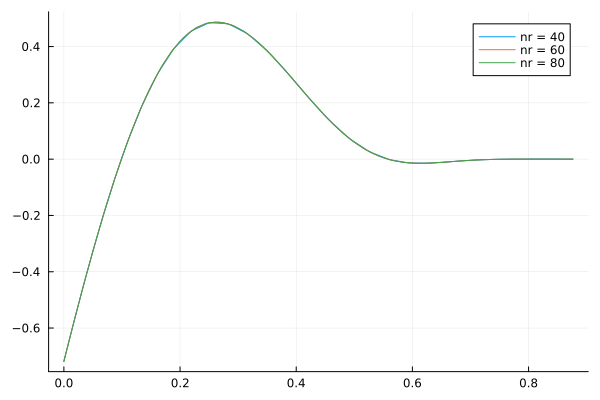

In [74]:
Plots.plot( rs1,[-v.im for v in v1],label="nr = 40")
Plots.plot!( rs2,[v.im for v in v2],label="nr = 60")
Plots.plot!( rs3,[v.im for v in v3],label="nr = 80")


# Interpolate to highest resolution

In [75]:
null1_interp = zeros(Complex{T},nr3);
null1_interp[1:nr1] = -null1[:,end];
null2_interp = zeros(Complex{T},nr3);
null2_interp[1:nr2] = null2[:,end];

In [76]:
v1_interp = CH.to_real(null1_interp[:,1]);
v2_interp = CH.to_real(null2_interp[:,1]);

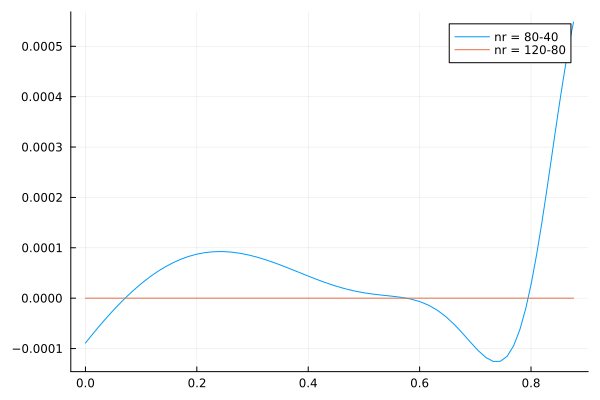

In [77]:
Plots.plot( rs3,[v.re for v in v2_interp-v1_interp],label="nr = 80-40")
Plots.plot!( rs3,[v.re for v in v3-v2_interp],label="nr = 120-80")


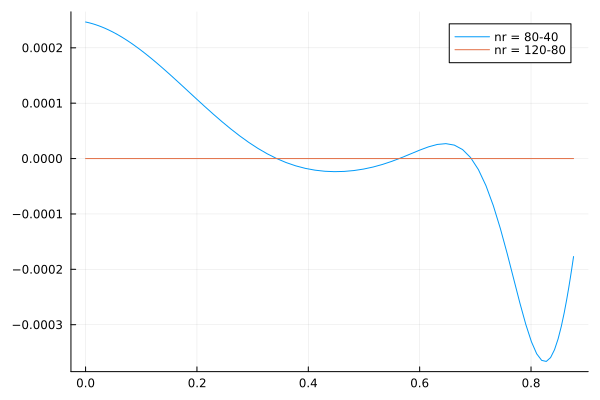

In [78]:
Plots.plot( rs3,[v.im for v in v2_interp-v1_interp],label="nr = 80-40")
Plots.plot!( rs3,[v.im for v in v3-v2_interp],label="nr = 120-80")
